In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np

In [2]:
stock_df=pd.read_csv('FTSE100.csv')
stock_df.head()

,Company,Shares,Ticker,Sector,Mid-price (p),Change,Our view,Brokers,Strong Buy,Buy,Neutral,Sell,Strong Sell,Recommendation
0,3i,4812,III,Financial Services,"1,099.50",0.0171,Hold,5,NaN,4,1,0,0,Buy
1,Admiral Group,1309,ADM,Nonlife Insurance,"2,115.00",-0.42%,Hold,18,NaN,2,6,7,3,Underweight
2,Anglo American plc,5349,AAL,Mining,"1,744.00",0.0154,Hold,24,NaN,15,6,2,0,Buy
3,Antofagasta,3940,ANTO,Mining,848.2,0.0326,Hold,21,NaN,8,9,3,0,Overweight
4,Ashtead Group,9769,AHT,Support Services,"2,207.00",0.0347,Buy,17,NaN,12,5,0,0,Buy


Reading the FTSE100 file and displaying the top 5 entries to show  visual arrangement of the data in the dataset

In [3]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         101 non-null    object 
 1   Shares          101 non-null    int64  
 2   Ticker          101 non-null    object 
 3   Sector          101 non-null    object 
 4   Mid-price (p)   101 non-null    object 
 5   Change          101 non-null    object 
 6   Our view        101 non-null    object 
 7   Brokers         101 non-null    int64  
 8   Strong Buy      0 non-null      float64
 9   Buy             101 non-null    int64  
 10  Neutral         101 non-null    int64  
 11  Sell            101 non-null    int64  
 12  Strong Sell     101 non-null    int64  
 13  Recommendation  101 non-null    object 
dtypes: float64(1), int64(6), object(7)
memory usage: 11.2+ KB


The dataset consists of 101 entries on financial companies, providing key details such as company names, shares, stock tickers, sectors, mid-prices, changes, and analysts' views. 

The 'Strong Buy' column has null values. 

In [4]:
stock_df.describe()

,Shares,Brokers,Strong Buy,Buy,Neutral,Sell,Strong Sell
count,101.000000,101.000000,0.0,101.000000,101.000000,101.000000,101.000000
mean,5281.792079,16.851485,NaN,7.099010,6.198020,2.049505,0.722772
std,3006.725858,4.744230,NaN,4.253246,3.307627,2.155812,1.001187
min,36.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,3015.000000,14.000000,NaN,4.000000,4.000000,0.000000,0.000000
50%,5349.000000,17.000000,NaN,7.000000,6.000000,1.000000,0.000000
75%,7896.000000,20.000000,NaN,10.000000,9.000000,3.000000,1.000000
max,9906.000000,29.000000,NaN,16.000000,16.000000,10.000000,4.000000


In [5]:
stock_df[['Shares', 'Brokers']].describe()

,Shares,Brokers
count,101.000000,101.000000
mean,5281.792079,16.851485
std,3006.725858,4.744230
min,36.000000,0.000000
25%,3015.000000,14.000000
50%,5349.000000,17.000000
75%,7896.000000,20.000000
max,9906.000000,29.000000


The mean of shares is 5282, showcasing significant variability with a minimum of 36 and a maximum of 9906. 
The average broker count is at 16.85, with notable diversity and a range from 0 to 29 brokers.
The quartile information underlines the spread of data, with 25% of companies having fewer than 3015 shares and 14  brokers. 
Companies with 0 brokers add a warrant for further investigation into the distinctive business models, the analysis illuminates the heterogeneous nature of financial companies suggesting avenues for deeper exploration

In [6]:
correlation_matrix = stock_df[['Shares', 'Brokers']].corr()
correlation_matrix

,Shares,Brokers
Shares,1.000000,-0.029213
Brokers,-0.029213,1.000000


The correlation matrix between shares and brokers is a weak negative correlation of -0.03, impling on average the companies with higher numbers of shares exhibit a slight decrease in the count of associated brokers

The correlation is minimal, suggesting that the relationship between shares and brokers is not a dominant factor in in this scenario. 

The findings have implications for resource allocation and operational considerations within financial companies.


In [7]:
sector_distribution = stock_df['Sector'].value_counts()
sector_distribution

Support Services                       8
Media                                  7
Mining                                 6
Banks                                  5
Household Goods & Home Construction    5
Travel & Leisure                       5
Life Insurance                         5
Financial Services                     5
Food & Drug Retailers                  4
General Retailers                      4
Gas, Water & Multi-utilities           4
Software & Computer Services           3
General Industrials                    3
Real Estate Investment Trusts          3
Oil & Gas Producers                    3
Nonlife Insurance                      3
Aerospace & Defence                    2
Tobacco                                2
Pharmaceuticals & Biotechnology        2
Chemicals                              2
Personal Goods                         2
Health Care Equipment & Services       2
Beverages                              2
Industrial Metals & Mining             1
Forestry & Paper

Support Services emerges as the most prominent sector with 8 companies, followed closely by Media with 7 and Mining with 6. Finance and insurance sectors, including Banks, Financial Services and Life Insurance, are well represented, each having 5 companies. 

Certain sectors, such as Industrial Metals & Mining, Equity Investment Instruments and Retail hospitality, have  1 company each, indicating a very limited presence. 

The findings suggest potential implications for portfolio diversification and risk management, particularly in sectors with higher concentrations.


In [8]:
recommendation_distribution = stock_df['Recommendation'].value_counts()
recommendation_distribution

Overweight     33
Buy            25
Neutral        21
Underweight    14
Strong Buy      6
Sell            1
Strong Sell     1
Name: Recommendation, dtype: int64

The analysis of recommendation distribution in the stock dataset highlights a prevailing positive sentiment among financial analysts.

Overweight recommendations are the most frequent, indicating optimism, followed by a significant number of Buy recommendations.
Negative sentiments, represented by Strong Sell and Sell, are infrequent, emphasizing the overall positive outlook. 

The scarcity of negative recommendations underscores the need for continuous monitoring and adaptability in investment strategies to navigate market dynamics effectively.

In [9]:
broker_recommendations = stock_df.groupby('Brokers')['Recommendation'].value_counts()
broker_recommendations

Brokers  Recommendation
0        Strong Sell       1
5        Buy               1
8        Strong Buy        1
10       Buy               1
         Strong Buy        1
11       Overweight        2
         Buy               1
         Neutral           1
         Strong Buy        1
         Underweight       1
12       Overweight        3
         Neutral           2
         Buy               1
         Underweight       1
13       Overweight        2
         Strong Buy        2
         Buy               1
         Underweight       1
14       Neutral           3
         Buy               1
         Overweight        1
15       Neutral           6
         Overweight        3
         Underweight       3
16       Overweight        3
         Neutral           2
         Sell              1
17       Buy               4
         Neutral           1
         Overweight        1
         Underweight       1
18       Overweight        5
         Buy               2
         Neutral   

Brokers 8, 10 and 13 mainly provide positive recommendations, indicating a bullish outlook, while Brokers 14, 15 and 18 adopt a more cautious approach. 
Broker 15 stands out for its comprehensive spectrum of recommendations, showing a nuanced perspective on various companies.

This information is crucial for investors, highlighting the need to consider recommendations from a diverse set of brokers and conduct due diligence on track records, it also provides valuable insights for dynamic portfolio adjustments aligned with the prevailing sentiments expressed by different brokers in the stock market.

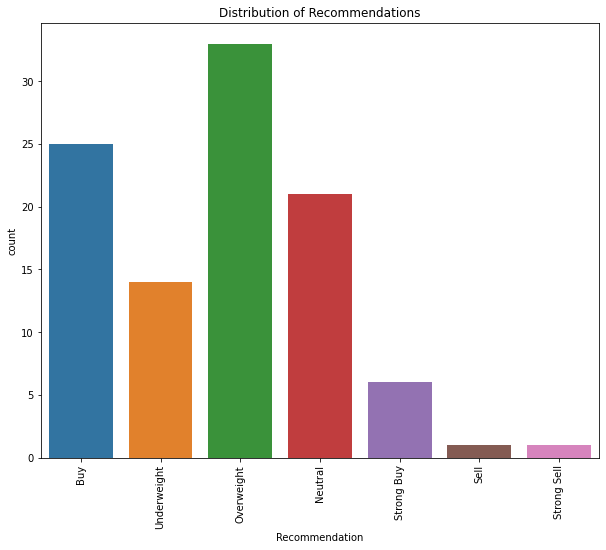

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(x='Recommendation', data=stock_df)
plt.title('Distribution of Recommendations')
plt.xticks(rotation=90)
plt.show()

A visual Bargraph showing the distribution of reccommendations

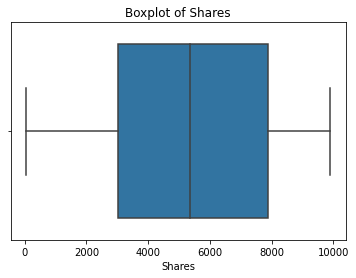

In [11]:
sns.boxplot(x=stock_df['Shares'])
plt.title('Boxplot of Shares')
plt.show()

The median share value is  5000, with a skew towards lower values. The 25th and 75th percentiles stand at 3000 and 7000, respectively. The minimum and maximum values are 2000 and 10000, with a single outlier at 30000. 